PGP - AIML MODULE PROEJCT

FEB-2024


PART- a

Please answer the following questions with all relevant assumptions, explanations and details. 
1. Please refer the table below to answer below questions: [2 Marks]
1.A. Refer above table and find the joint probability of the people who planned to purchase and actually placed an order. [1 Mark]
1.B. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that 
people planned to purchase. [1 Mark]
2. An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the 
failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following 
questions. [4 Marks]
2.A. Probability that none of the items are defective? [1 Mark]
2.B. Probability that exactly one of the items is defective? [1 Mark]
2.C. Probability that two or fewer of the items are defective? [1 Mark]
2.D. Probability that three or more of the items are defective ? [1 Mark]
3. A car salesman sells on an average 3 cars per week. [3 Marks]
3.A. What is Probability that in a given week he will sell some cars? [1 Mark]
3.B. What is Probability that in a given week he will sell 2 or more but less than 5 cars? [1 Mark]
3.C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week. [1 Mark]
4. Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed, 
marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the 
percentage of orders that are taken correctly is 86.8%. Suppose that you place an order with the bot and two friends of yours 
independently place orders with the same bot. Answer the following questions. [3 Marks] 
4.A. What is the probability that all three orders will be recognised correctly? [1 Mark]
4.B. What is the probability that none of the three orders will be recognised correctly? [1 Mark]
4.C. What is the probability that at least two of the three orders will be recognised correctly? [1 Mark]
5. Explain 1 real life industry scenario (other than the ones mentioned above) where you can use the concepts learnt in this module of 
Applied Statistics to get data driven business solution. [3 Marks] 

Please refer the table below to answer below questions:

1.A. Refer above table and find the joint probability of the people who planned to purchase and actually placed an order.

question rephased: What is the probability of a randomly selected people who planned to purchase and actually placed an order

In [259]:
import pandas as pd

# Create the data with self explainary variable and field names
data = {
    'Planned_To_Purchase': ['Yes', 'No'],
    'Order_Placed': [400, 200],
    'Order_Not_Placed': [100, 1300],
}

# Create DataFrame
df = pd.DataFrame(data);

print(df);

  Planned_To_Purchase  Order_Placed  Order_Not_Placed
0                 Yes           400               100
1                  No           200              1300


In [260]:
People_Planned_And_Purchased =df[df['Planned_To_Purchase'] == 'Yes']['Order_Placed']
Total_People =df.iloc[:,1:3].sum().sum()
joint_probability_plan_and_purchansed = ( People_Planned_And_Purchased / Total_People)

print(f"Answer 1 : Joint probability of Planned to purchase = {joint_probability_plan_and_purchansed[0]}");

Answer 1 : Joint probability of Planned to purchase = 0.2


1.B. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that 
people planned to purchase. 

In [261]:
People_Planned_To_Purchase = df[df['Planned_To_Purchase'] == 'Yes'].iloc[:,1:3].sum().sum()

conditional_probability_plan_and_purchased_given_planned_to_purchase = People_Planned_And_Purchased/People_Planned_To_Purchase 

print(f"Answer 2 : Conditional probability of People Planned and purchase given Planned to purchase = {conditional_probability_plan_and_purchased_given_planned_to_purchase[0]}");

Answer 2 : Conditional probability of People Planned and purchase given Planned to purchase = 0.8


2. An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the 
failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following 
questions.

In [262]:
Failure_Probability = 0.5
Sample_Size = 10


Question 2.A. Probability that none of the items are defective?

Answer: Because probability outcome of a single trial can only have two possible outcomes, thus we will apply the Binomial probability formula, i.e.:
P(X = k) = (n choose k) * p^k * (1-p)^(n-k)

P(X=0) = (10 choose 0) * .05^0 * (.95)^(10)
P(X=0) = 1 * 1 * 0.5987
P(X=0) = 0.5987 =  approx 60%

In [263]:
from scipy.stats import binom

n = no_of_trials = 10  
probability_of_success = 0.05 # in this case probability of failure against trail  

#Number of successes you want to find the probability for
k = required_no_of_success = 0  #For the question, we want to find the probability of 0 defective items

probability_mass_function = binom.pmf(k, no_of_trials, probability_of_success)
print("Probability:", probability_mass_function)

Probability: 0.5987369392383789


In [264]:
#Question 2B: Probability that exactly one of the items is defective?
no_of_trials = n = 10  
probability_of_success = p = 0.05
required_no_of_success = k = 1  #For the question, we want to find the probability of 1 defective item
p_to_get_exact_1_defective_item = binom.pmf(required_no_of_success, no_of_trials, probability_of_success)
print("Probability to get exact 1 defective item:", p_to_get_exact_1_defective_item)

#Question 2C: Probability that exactly two of the items are defective?
k = required_no_of_success = 2  #For the question, we want to find the probability of exact 2 defective items
p_to_get_exact_2_defective_item = binom.pmf(required_no_of_success, no_of_trials, probability_of_success)
print("Probability to get exact 2 defective items:", p_to_get_exact_2_defective_item)

#Question 2C: Probability that two or fewer of the items are defective?
k = required_no_of_maximum_success = 2 #because we need to find a cumulative success from 0 to 2 , thus I will use the cdf function   
p_to_get_max_2_defective_item = binom.cdf(required_no_of_maximum_success, no_of_trials, probability_of_success)
print("Probability to get <= 2 defective items:", p_to_get_max_2_defective_item)

#Question 2D: Probability that three or more of the items are defective?
#because we need to find a cumulative success from 3 to 10 , as the range not starting from 0, thus I will use Survival function
#Note: sf function needs k to have more than not "more than and euqal to" thus I am using 2 , because 3 or more is >2
k = required_no_of_success_more_than = 2 
p_to_get_min_3_defective_item = binom.sf(required_no_of_success_more_than, no_of_trials, probability_of_success)
print("Probability to get >= 3 defective items:", p_to_get_min_3_defective_item)

Probability to get exact 1 defective item: 0.3151247048623047
Probability to get exact 2 defective items: 0.07463479852001963
Probability to get <= 2 defective items: 0.9884964426207031
Probability to get >= 3 defective items: 0.01150355737929688


Scenario 3. A car salesman sells on an average 3 cars per week.

In [265]:
#here we have avg rate of occurance and we need to find the P from it, thus we will use Poisson fn from scipy
from scipy.stats import poisson

average_rate_of_occurance = mu =  3

#Question 3A: What is Probability that in a given week he will sell some cars?
#because the fn does not allow to enter required_p_for_minimum_occurance directly, rather it allows to idenfiy cumulative probability from minimum to given occurance
#, thus we will find the p for 0 occurance and then deduct it from 1 to find the P for all other occurances 
required_p_for_minimum_occurance = k = 1 
p_for_given_or_more_occurance = 1-poisson.cdf(required_p_for_minimum_occurance, average_rate_of_occurance)
print(f'Probability that sales person will sell some (1 or more) cars: = "{p_for_given_or_more_occurance }')

#Question 3B: What is Probability that in a given week he will sell 2 or more but less than 5 cars?
required_p_for_min_occurance = 2
required_p_for_max_occurance = 5
#we can calulate using cdf function, because it does not provide direct range based calculation, thus we need to find the cumilate (0 or given) P for min and max , then deduct max P from min P
required_p_upto_min_occurance = required_p_for_min_occurance-1
required_p_upto_max_occurance = required_p_for_max_occurance-1
p_for_min_occurance = poisson.cdf(required_p_upto_min_occurance, average_rate_of_occurance)
p_for_max_occurance = poisson.cdf(required_p_upto_max_occurance, average_rate_of_occurance)
print(f'Probability that sales person will sell >=2 and < 5 cars: = "{p_for_max_occurance - p_for_min_occurance}')
#another way : because we know exactly the 3 point where we need probability to calculate, and then we can sum them to get the answer, thus we can also use mass function.
print(f'Probability that sales person will sell >=2 and < 5 cars: = "{poisson.pmf(2,average_rate_of_occurance)+poisson.pmf(3,average_rate_of_occurance)+poisson.pmf(4,average_rate_of_occurance)}')

Probability that sales person will sell some (1 or more) cars: = "0.8008517265285442
Probability that sales person will sell >=2 and < 5 cars: = "0.6161149710523164
Probability that sales person will sell >=2 and < 5 cars: = "0.6161149710523164


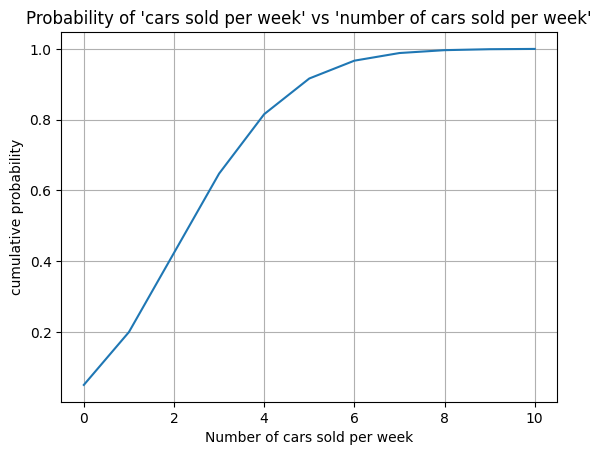

In [266]:
#Question 3C: Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week.
import numpy as np
import matplotlib.pyplot as plt

#Generate x values (number of cars sold per week)
x_values = np.arange(0, 11)  #Let's consider up to 10 cars sold

#Calculate the cumulative probabilities for each x value
cumulative_probabilities = poisson.cdf(x_values, average_rate_of_occurance)

#Plot the Poisson distribution function
plt.plot(x_values, cumulative_probabilities)
plt.title("Probability of 'cars sold per week' vs 'number of cars sold per week'")
plt.xlabel('Number of cars sold per week')
plt.ylabel('cumulative probability')
plt.grid(True)
plt.show()

Scenario 4. Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed, 
marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the 
percentage of orders that are taken correctly is 86.8%. Suppose that you place an order with the bot and two friends of yours 
independently place orders with the same bot. Answer the following questions.

In [267]:
#For this scenario we know that the probability will be cumulation of result of either true or false thus we will us binomial functions
probability_of_success = p = 0.868
no_of_trials = no_of_orders = 3

#Question 4A: What is the probability that all three orders will be recognised correctly?
#Anwer: here we need to find the probability of occuring three success independently, thus we will multiply the independent probability
print (f"Answer 4A: The probability that all three orders will be recognized = {.868**3} or by using mass function = {binom.pmf(3,no_of_orders,probability_of_success)}")

#Question 4B: What is the probability that none of the three orders will be recognised correctly?
#Answer: herw wee need to find the probability of each order not getting recognized first, then we need to find the P when the same event occurs trice, #For this we will  multiple the (1-p_of_success) 3 times
print (f"Answer 4B: Probability that none of the three orders will be recognized correctly: = {(1-.868)**3}  or by using mass function = {binom.pmf(0,no_of_orders,probability_of_success)}")

#Question 4C: What is the probability that at least two of the three orders will be recognised correctly?
#Answer: herw wee need to find the cumulative probability upto 2 successful occurance, #For this we an use cdf function
required_no_of_minimum_success = k = 2
#because cdf function takes required_no_of_maximum_success, and in this case we need required_no_of_minimum_success thus we need first find required_no_of_minimum_success of the orders
#i.e. cumulative probability upto 1 success orders, then reuce it from total possible probability i.e. 1
from scipy.stats import binom
P_for_minimum_of_2_occurance = 1 - binom.cdf(1, no_of_trials, probability_of_success)
print (f"Answer 4C: probability that at least two of the three orders will be recognised correctly: = {P_for_minimum_of_2_occurance}")

Answer 4A: The probability that all three orders will be recognized = 0.653972032 or by using mass function = 0.653972032
Answer 4B: Probability that none of the three orders will be recognized correctly: = 0.0022999680000000003  or by using mass function = 0.002299968
Answer 4C: probability that at least two of the three orders will be recognised correctly: = 0.952327936


**PART-A Last Question : Explain 1 real life industry scenario (other than the ones mentioned above) where you can use the concepts learnt in this module of 
Applied Statistics to get data driven business solution.

I would like to take this opportunity to explain the Dell's (my current organization) "Supply Chain and Order Promising for Stocked system in US" scenario

Here we go:

Real-life Industry Scenario: Enhancing Estimated Delivery Date (EDD) Accuracy for Dell's Build to Stock (BTS) Systems in the US
Objective:
The aim is to improve the accuracy of Estimated Delivery Dates (EDD) for Dell's Build to Stock (BTS) systems among US customers. This enhancement will leverage applied statistics techniques, utilizing historical data and considering potential hidden inventory.

Key Variables: I've categorized those in various contexts.

A: Product Taxonomy: Categorization of products to optimize production schedules.
Shipping Method: Analysis of shipping methods to estimate delivery times and streamline logistics.
Timespan:

B:Order Day of Week: Examination of weekly demand patterns to optimize staffing and production schedules.
Hour-Slab of the Day: Identification of peak order hours for efficient resource allocation.
Geo Context:

C:Business Unit: Analysis of regional demand variations to optimize inventory allocation.
Ship To State: Consideration of regional shipping constraints for accurate delivery time estimates.
Priority Context:

D: Prioritization Identifier: Identification of priority orders to ensure timely delivery for key customers.
Customer Context:

E: Customer Segments: Analysis of demand patterns across different customer segments for tailored production and delivery strategies.
Company Number: Tracking of orders based on customer companies to prioritize accordingly.
Availability Context:

F: Inventory: Assessment of current inventory levels to determine production and delivery capabilities.
Backlogs: Identification of pending orders impacting future delivery schedules.
Probability and Distributions:
Bayes Theorem: Assessing the likelihood of meeting EDD targets based on historical data and contextual variables.
Inferential Statistics: Analyzing sample data to optimize production schedules.
Binomial Distribution: Modeling discrete events such as order quantities for prioritizing production schedules.
Normal Distribution: Modeling demand variability for accurate production and delivery targets.
Poisson Distribution: Modeling the variability of lead times and shipping times for EDD predictions.
Implementation and Integration of Python's SciPy Functions:
Utilization of SciPy's functions for descriptive statistics, regression analysis, and distribution fitting to optimize EDD predictions. Python programming will be applied to implement statistical models and analyze historical data effectively.

Analysis Approach:
Descriptive Analysis: Analyzing historical data to identify demand patterns and trends.
Inferential Analysis: Applying statistical techniques to optimize production schedules.
Multivariate Analysis: Identifying significant variables affecting EDD accuracy for optimized strategies.
Time Series Analysis: Forecasting future demand trends for adjustments in production and delivery schedules.
Customer Sentiment Analysis:
Analyzing customer sentiments to understand preferences regarding delivery timings and adjusting EDD predictions accordingly. Identifying customer tolerance levels for early or late deliveries to meet expectations.

Hidden Inventory Analysis:
Analyzing historical data to identify patterns of hidden inventory and adjusting EDD predictions. Developing strategies to mitigate the impact of hidden inventory on EDD accuracy and optimizing production schedules.

Probabilistic Approach using Applied Statistics:
Delivery Delay Analysis: Utilizing descriptive statistics and probability distributions to analyze and predict delivery delays.
Historical Data Analysis: Employing time series analysis to identify trends in order placement times and delivery performance.
Peak Order Time Analysis: Utilizing clustering techniques to identify peak order times and adjust SDS cut-off times accordingly.
Correlation Analysis: Investigating correlations between order volumes, fulfillment capacities, and same-day delivery success rates to optimize cut-off times.
By applying these techniques, Dell can enhance its BTS systems' EDD accuracy, leading to improved customer satisfaction and operational efficiency in the US market.


**DOMAIN: Sports**

**• CONTEXT:**

Company X manages the men's top professional basketball division of the American league system. The dataset contains information on all the teams that have participated in all the past tournaments. It has data about how many baskets each team scored, conceded, how many times they came within the first 2 positions, how many tournaments they have qualified, their best position in the past, etc.

• **DATA DESCRIPTION:** 

bb.csv - The data set contains information on all the teams so far participated in all the past tournaments.

**• ATTRIBUTE INFORMATION:**
1. Team: Team’s name
2. Tournament: Number of played tournaments.
3. Score: Team’s score so far.
4. PlayedGames: Games played by the team so far.
5. WonGames: Games won by the team so far.
6. DrawnGames: Games drawn by the team so far.
7. LostGames: Games lost by the team so far.
8. BasketScored: Basket scored by the team so far.
9. BasketGiven: Basket scored against the team so far.
10. TournamentChampion: How many times the team was a champion of the tournaments so far.
11. Runner-up: How many times the team was a runners-up of the tournaments so far.
12. TeamLaunch: Year the team was launched on professional bb.
13. HighestPositionHeld: Highest position held by the team amongst all the tournaments played.

**• PROJECT OBJECTIVE:** 

Company’s management wants to invest on proposal on managing some of the best teams in the league. The analytics department has been assigned with a task of creating a report on the performance shown by the teams. Some of the older teams are already in contract with competitors. Hence Company X wants to understand which teams they can approach which will be a deal win for them.

Steps and tasks: [ Total Score: 15 points]
1. Read the data set, clean the data and prepare a final dataset to be used for analysis.
2. Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get a data
driven insights on recommending which teams they can approach which will be a deal win for them.. Also as a data
and statistics expert you have to develop a detailed performance report using this data.
Hint: Use statistical techniques and visualisation techniques to come up with useful metrics and reporting. Find out
the best performing team, oldest team, team with highest goals, team with lowest performance etc. and many more.
These are just random examples please use your best analytical approach to build this report. You can mix match
columns to create new ones which can be used for better analysis. Create your own features if required. Be highly
experimental and analytical here to find hidden patterns. Use graphical interactive libraries to enable you to publish
interactive plots in python.
3. Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity,
veracity etc. on the data points collected by the association to perform a better data analysis in future.

In [268]:
#Import basic packages
import numpy as np    
import pandas as pd

#import csv to df
bb = pd.read_csv('DS_Part2_BasketBall.csv') 

bb.describe(include='all')
bb.info() 
#No null values in any of the column. 
#2 columns with datatype as int64 (Tournament and HighestPositionHeld)

bb.shape 

#Data frame has 61 rows and 13 columns. 

bb.head()
#top rows clearly shows invalid values '-' in TournamentChampion , runner-up columns, we will assume that the team has not won any chapion title or runner up for '-' value

bb.tail()
#last team has many missing data , we will remove the team from other analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


Data Cleaning

In [269]:
#counting the missing values

missing_value_count = bb.isnull().sum()
print(missing_value_count[0:13])

bb= bb.replace('-',0)
#In 'TeamLaunch' column there are characters like 'to', '-', '~'.  so cleaning data by removing these.

bb = bb.replace(to_replace ='to', value = '-', regex = True) 
bb = bb.replace(to_replace ='_', value = '-', regex = True) 
bb = bb.replace(to_replace ='~', value = '-', regex = True)

bb.head(10)

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931-32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934-35,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939-40,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932-33,1


In [270]:
#Change the object datatype into int
#All the columns except "Team" can be changed to int column
bb_new = bb.copy()
# Storing only the starting year of team laucnh, i.e. keeping only the first four characters from column 
bb_new['TeamLaunch'] = bb['TeamLaunch'].str[:4]
# Changing the data type of 'TeamLauch' as integer
bb_new['TeamLaunch'] = bb_new['TeamLaunch'].astype(int)

**EXPLORATORY DATA ANALYSIS**

In [271]:
# Formatting the teamlauch column so it can be processed as int 
bb_new.head(10)

# Changing the data type of all the columns except 'Team'column of dataframe as int
bb_new = bb_new.loc[:,bb_new.columns !='Team'] 

bb_new = bb_new.astype(int)

In [272]:
# Appending the 'Team' column which is of data type 'string' and dropped while doing type conversion with the converted dataframe
bb_new['Team']=(bb['Team'])
first_column =bb_new.pop('Team')
bb_new.insert(0, 'Team', first_column) # Insert 'Team' as the first column
bb_new.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [273]:
# Lets get the team who played maximum number of Tournament
bb_new.groupby(['Team'])['Tournament'].sum().sort_values(ascending=False).head(5)

Team
Team 1    86
Team 2    86
Team 5    86
Team 7    82
Team 4    82
Name: Tournament, dtype: int32

In [274]:
# Get the teams who played minimum number of Tournament
bb_new.groupby(['Team'])['Tournament'].sum().sort_values(ascending=True).head(5)

Team
Team 56    1
Team 59    1
Team 58    1
Team 61    1
Team 57    1
Name: Tournament, dtype: int32

In [275]:
# Calculate the WINNIING % of the team from PlayedGames	and WonGames and adding extra column to the dataframe
bb_new['WinResult'] = bb_new['WonGames']/bb_new['PlayedGames']
bb_new['WinResult'].dtype
TopWin = bb_new['WinResult'].sort_values(ascending =False).head(10)
print('The top 5 teams, which won the maximum games are')
bb_new.groupby(['Team'])['WinResult'].sum().sort_values(ascending =False).head(5)

The top 5 teams, which won the maximum games are


Team
Team 1    0.596307
Team 2    0.572411
Team 3    0.474751
Team 4    0.445571
Team 5    0.437726
Name: WinResult, dtype: float64

In [276]:
# Calculate the percentage of getting championship against tounament played
bb_new['Champions'] = bb_new['TournamentChampion']/bb_new['Tournament']
bb_new['Champions'].dtype
TopChampions = bb_new['Champions'].sort_values(ascending =False).head(10)
print('The top 5 teams which became Champions are:')
bb_new.groupby(['Team'])['Champions'].sum().sort_values(ascending =False).head(5)

The top 5 teams which became Champions are:


Team
Team 1    0.383721
Team 2    0.290698
Team 3    0.125000
Team 5    0.093023
Team 4    0.073171
Name: Champions, dtype: float64

In [277]:
# Calculate the total period, the team is playing the tournament assuming the teams included upto 2020
bb_new['TeamAge'] = 2020-bb_new['TeamLaunch']
print('The oldest team in the tournament is of age: ',bb_new['TeamAge'].max())
print('The oldest team in the tournament are: ')
print(bb_new[bb_new['TeamAge'] == bb_new['TeamAge'].max()]) 

The oldest team in the tournament is of age:  91
The oldest team in the tournament are: 
       Team  Tournament  Score  PlayedGames  WonGames  DrawnGames  LostGames  \
0    Team 1          86   4385         2762      1647         552        563   
1    Team 2          86   4262         2762      1581         573        608   
2    Team 3          80   3442         2614      1241         598        775   
4    Team 5          86   3368         2762      1209         633        920   
6    Team 7          82   2792         2626       948         608       1070   
7    Team 8          70   2573         2302       864         577        861   
13  Team 14          44   1416         1428       453         336        639   
44  Team 45           7    107          130        43          21         66   
51  Team 52           4     56           72        21          14         37   
53  Team 54           3     42           54        18           6         30   

    BasketScored  BasketGiven 

In [278]:
print('The newest team in the tournament is of age: ',bb_new['TeamAge'].min())
print('The newest team in the tournament are: ')
print(bb_new[bb_new['TeamAge'] == bb_new['TeamAge'].min()])

The newest team in the tournament is of age:  3
The newest team in the tournament are: 
       Team  Tournament  Score  PlayedGames  WonGames  DrawnGames  LostGames  \
60  Team 61           1      0            0         0           0          0   

    BasketScored  BasketGiven  TournamentChampion  Runner-up  TeamLaunch  \
60             0            0                   0          0        2017   

    HighestPositionHeld  WinResult  Champions  TeamAge  
60                    9        NaN        0.0        3  


In [279]:
# Getting the teams those who played maximum number of Tournament against the age of the team
bb_new['TeamExperience'] = bb_new['TeamAge']/bb_new['Tournament']
bb_new['TeamExperience'].dtype
print('The top 5 teams with maximum experience of Tournament are:')
bb_new.groupby(['Team'])['TeamExperience'].sum().sort_values(ascending =False).head(5)

The top 5 teams with maximum experience of Tournament are:


Team
Team 59    69.000000
Team 60    65.000000
Team 58    64.000000
Team 55    35.000000
Team 54    30.333333
Name: TeamExperience, dtype: float64

In [280]:
print('The 5 teams with minimum experience of Tournament are:')
bb_new.groupby(['Team'])['TeamExperience'].sum().sort_values(ascending =True).head(5)

The 5 teams with minimum experience of Tournament are:


Team
Team 1    1.058140
Team 5    1.058140
Team 2    1.058140
Team 4    1.085366
Team 7    1.109756
Name: TeamExperience, dtype: float64

In [281]:
# Calculate the percentage of getting championship against experience
bb_new['TeamPerformance'] = bb_new['Champions']/bb_new['TeamExperience']
bb_new['TeamPerformance'].dtype
print('The top 5 teams with the percentage of getting championship against experience are:')
bb_new.groupby(['Team'])['TeamPerformance'].sum().sort_values(ascending =False).head(5)

The top 5 teams with the percentage of getting championship against experience are:


Team
Team 1    0.362637
Team 2    0.274725
Team 3    0.109890
Team 5    0.087912
Team 4    0.067416
Name: TeamPerformance, dtype: float64

In [282]:
# Lets Filter the dataframe to understand age of the team, WinResult, Champions,Team Experience and Team Performance
df_1=bb_new.filter(items=['Team', 'TeamAge', 'TeamExperience','TeamPerformance','WinResult','Champions']) 
df_1

,Team,TeamAge,TeamExperience,TeamPerformance,WinResult,Champions
0,Team 1,91,1.058140,0.362637,0.596307,0.383721
1,Team 2,91,1.058140,0.274725,0.572411,0.290698
2,Team 3,91,1.137500,0.109890,0.474751,0.125000
3,Team 4,89,1.085366,0.067416,0.445571,0.073171
4,Team 5,91,1.058140,0.087912,0.437726,0.093023
...,...,...,...,...,...,...
56,Team 57,11,11.000000,0.000000,0.210526,0.000000
57,Team 58,64,64.000000,0.000000,0.233333,0.000000
58,Team 59,69,69.000000,0.000000,0.233333,0.000000
59,Team 60,65,65.000000,0.000000,0.166667,0.000000


lets explore data using graphs and charts

<Axes: xlabel='TeamAge', ylabel='TeamPerformance'>

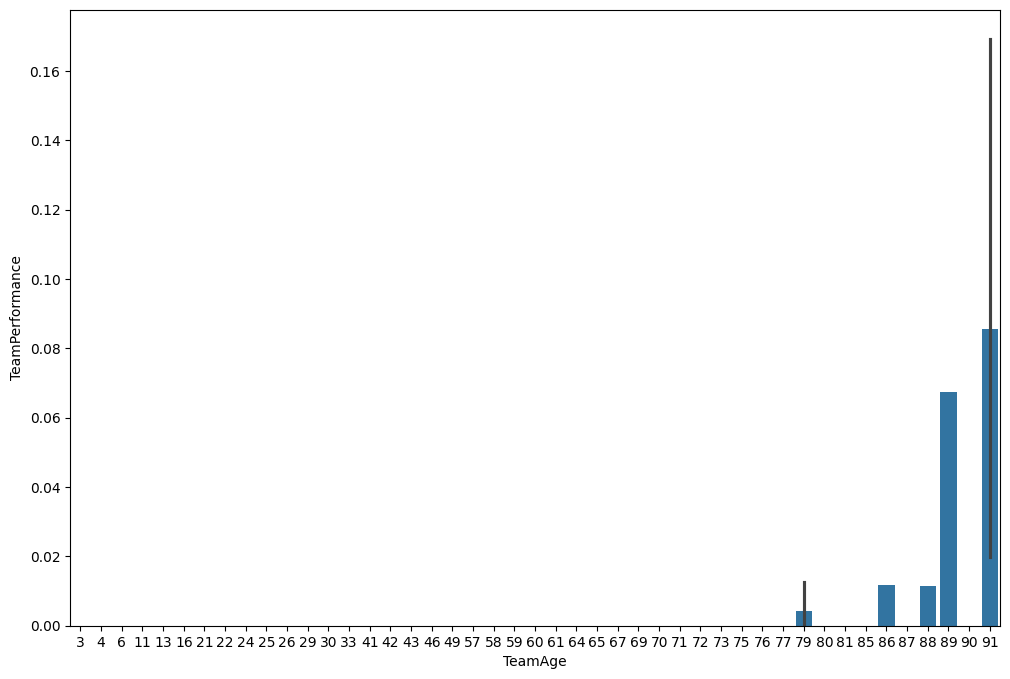

In [283]:
import seaborn as sns

# Let's find the team with better performance
plt.figure(figsize = (12,8))
# Plot the teamAge against the Team Performance
sns.barplot(x='TeamAge', y='TeamPerformance',data=df_1)

**It is observed that Team of the age 91 has better performance.(Team 1, 2 and 3)**

<Axes: xlabel='TeamAge'>

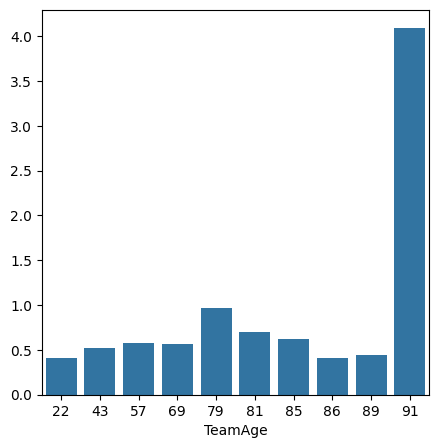

In [284]:
# Let's find the team with better win results
# Plot the top 10 teams which gave better win results 
df_2=bb_new.groupby(['TeamAge'])['WinResult'].sum().sort_values(ascending =False).head(10)                                                                                           
plt.figure(figsize = (5,5))
sns.barplot(y = df_2.values ,x = df_2.index)

 **It is observed that Team of age 91 and 79 has Won more games with respect to the total games played.**

In [285]:
# #  Let's find the correlation matrix between all the performance metrics
numeric_df = df_1.select_dtypes(include=['number'])
corr=numeric_df.corr()
corr

,TeamAge,TeamExperience,TeamPerformance,WinResult,Champions
TeamAge,1.000000,0.046113,0.285774,0.491259,0.292787
TeamExperience,0.046113,1.000000,-0.149389,-0.450864,-0.153466
TeamPerformance,0.285774,-0.149389,1.000000,0.766421,0.999545
WinResult,0.491259,-0.450864,0.766421,1.000000,0.772811
Champions,0.292787,-0.153466,0.999545,0.772811,1.000000


<Axes: >

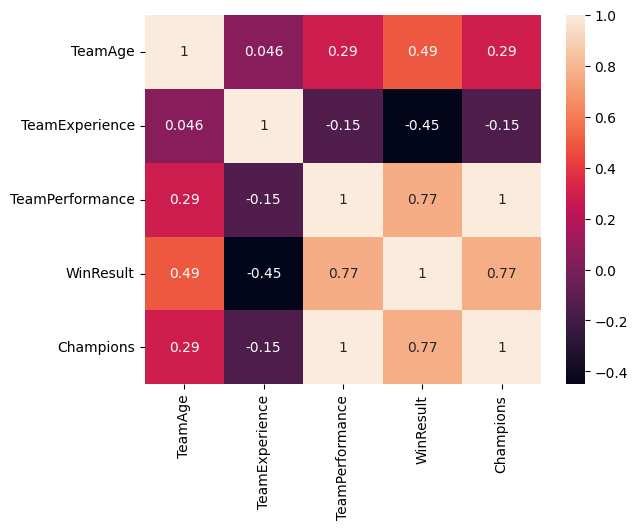

In [286]:
sns.heatmap(corr, annot = True)

**The Correlation table shows high correlation between Team Performance and Tournament Champions**.

<Axes: xlabel='TeamAge'>

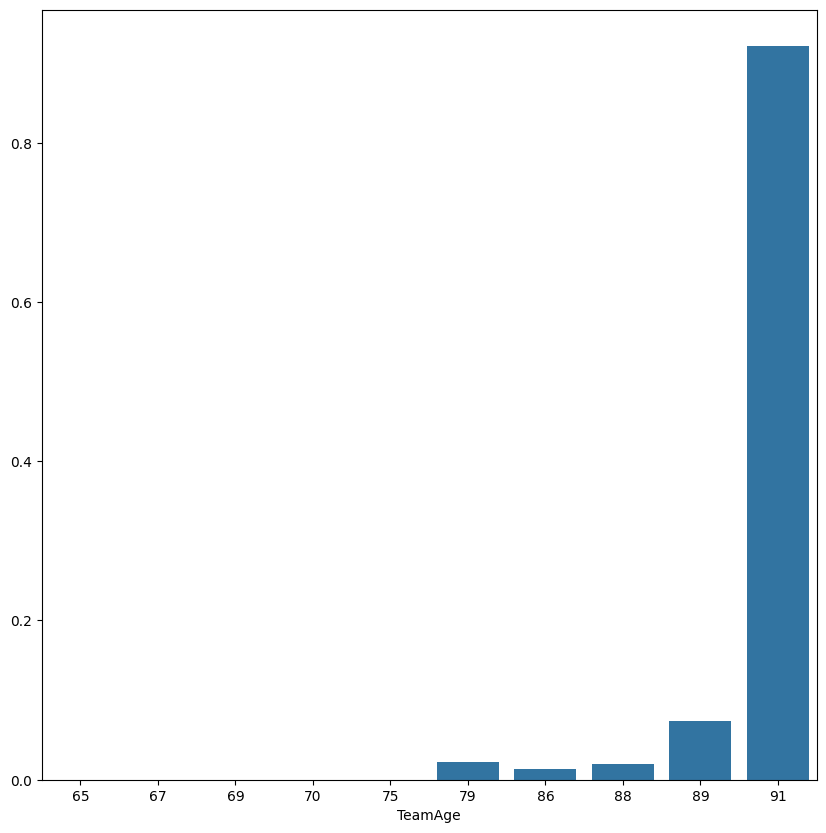

In [287]:
# Let's find the team which has got championship
# Plot the top 10 teams which were champions
df_3=bb_new.groupby(['TeamAge'])['Champions'].sum().sort_values(ascending =False).head(10)                                                                                           
plt.figure(figsize = (10,10))
sns.barplot(y = df_3.values ,x = df_3.index)

<Axes: xlabel='Champions', ylabel='HighestPositionHeld'>

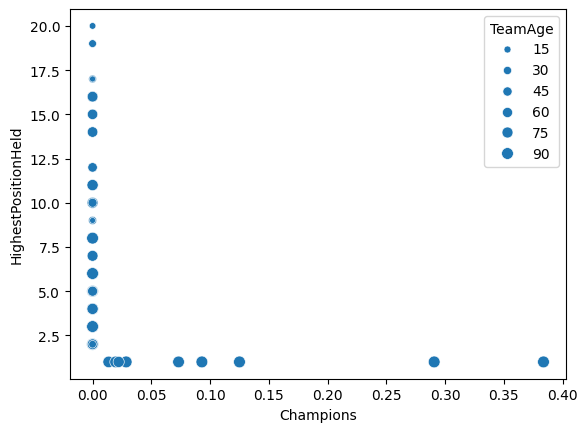

In [288]:
# Lets compare New vs old team's performance with respect to age and Highest Position based on Championship 
sns.scatterplot(data=bb_new, x="Champions", y="HighestPositionHeld",size="TeamAge")

<Axes: xlabel='WinResult', ylabel='HighestPositionHeld'>

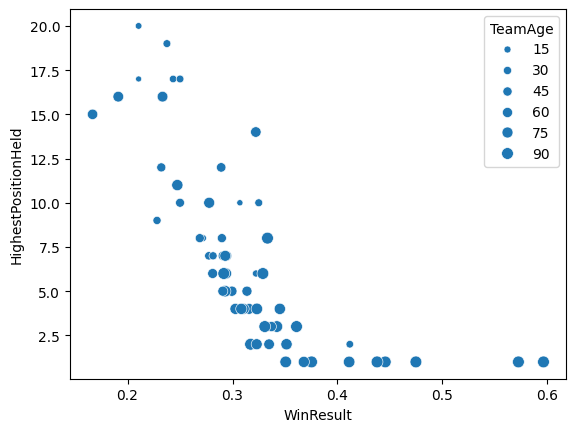

In [289]:
# Lets compare New vs old team's performance with respect to age and Highest Position based on WinResult 
sns.scatterplot(data=bb_new, x="WinResult", y="HighestPositionHeld",size="TeamAge")

Team of age 15 (Young Team) held the Highest Position

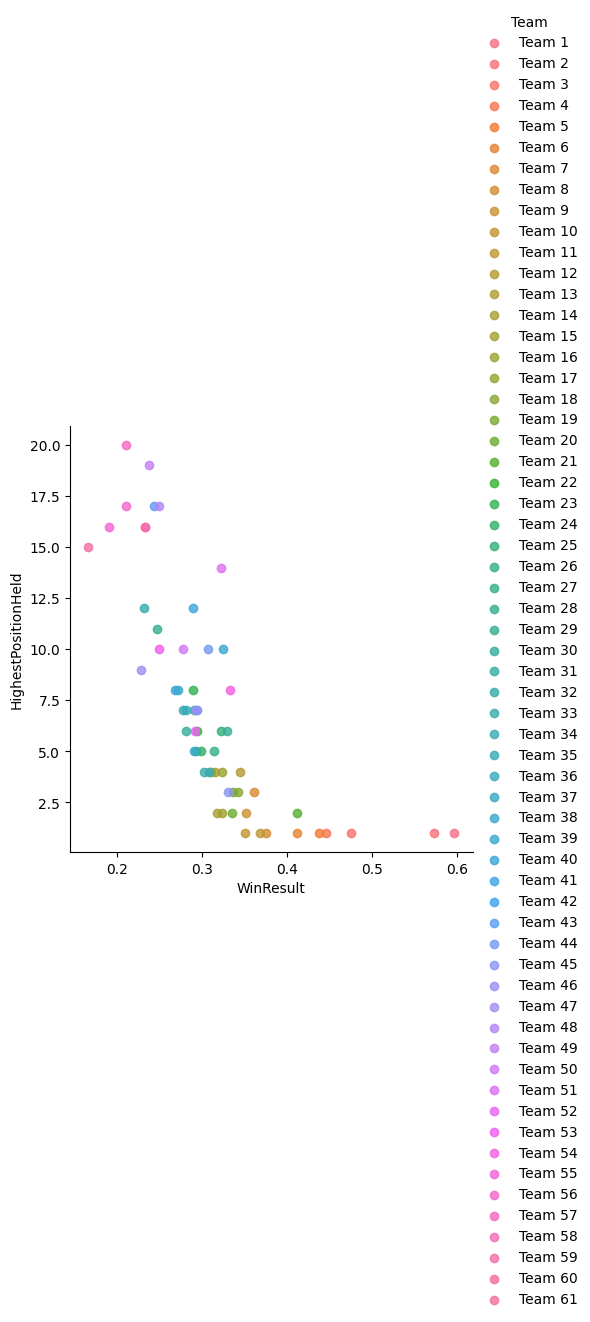

In [290]:
sns.lmplot(x="WinResult", y="HighestPositionHeld", hue = "Team", data=bb_new)

Team 57 held the Highest Position

**TOP 5 TEAMS FROM BELOW CONSOLIDATED TABLES A AND B CAN TREATED AS BEST PERFORMERS AND HENCE COMPANY CAN CHOOSE BETWEEN THESE TEAMS FOR SPONSORSHIP**

In [291]:
df_4 = df_1.sort_values(by='WinResult',ascending=False) # Top performing teams
print('TOP OLD TEAMS TABLE A')
df_4.sort_values(by='TeamAge',ascending=False).head(5) # Top Performing old teams 

TOP OLD TEAMS TABLE A


,Team,TeamAge,TeamExperience,TeamPerformance,WinResult,Champions
0,Team 1,91,1.05814,0.362637,0.596307,0.383721
51,Team 52,91,22.75000,0.000000,0.291667,0.000000
2,Team 3,91,1.13750,0.109890,0.474751,0.125000
4,Team 5,91,1.05814,0.087912,0.437726,0.093023
1,Team 2,91,1.05814,0.274725,0.572411,0.290698


In [292]:
df_5 = df_1.sort_values(by='TeamExperience',ascending=False) # Top performing teams
print('TOP OLD TEAMS :TABLE B')
df_5.sort_values(by='TeamAge',ascending=False).head(5) 

TOP OLD TEAMS :TABLE B


,Team,TeamAge,TeamExperience,TeamPerformance,WinResult,Champions
0,Team 1,91,1.058140,0.362637,0.596307,0.383721
4,Team 5,91,1.058140,0.087912,0.437726,0.093023
53,Team 54,91,30.333333,0.000000,0.333333,0.000000
51,Team 52,91,22.750000,0.000000,0.291667,0.000000
1,Team 2,91,1.058140,0.274725,0.572411,0.290698


In [293]:
# If Top Performing old teams above are already in contract with competitors 
# then below Young Teams Can be approach
print('Top Young Teams: TABLE A')
df_4.sort_values(by='TeamAge',ascending=True).head(5)

Top Young Teams: TABLE A


,Team,TeamAge,TeamExperience,TeamPerformance,WinResult,Champions
60,Team 61,3,3.000000,0.0,NaN,0.0
55,Team 56,4,4.000000,0.0,0.210526,0.0
43,Team 44,6,2.000000,0.0,0.307018,0.0
56,Team 57,11,11.000000,0.0,0.210526,0.0
36,Team 37,13,2.166667,0.0,0.271930,0.0


In [294]:
print('Top Young Teams: TABLE B')
df_5.sort_values(by='TeamAge',ascending=True).head(5)

Top Young Teams: TABLE B


,Team,TeamAge,TeamExperience,TeamPerformance,WinResult,Champions
60,Team 61,3,3.000000,0.0,NaN,0.0
55,Team 56,4,4.000000,0.0,0.210526,0.0
43,Team 44,6,2.000000,0.0,0.307018,0.0
56,Team 57,11,11.000000,0.0,0.210526,0.0
36,Team 37,13,2.166667,0.0,0.271930,0.0


3. Following are improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the data points collected by the association to perform a better data analysis in future.

*  Teams which are already in contract with competitors
*  The year for which the decision is to be made
*   Top players of the team




**-----------------------PART-2 COMPLETED----------------------------

PART-3

DOMAIN: Startup ecosystem
• CONTEXT: Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the business related to 
technology news, analysis of emerging trends and profiling of new tech businesses and products. Their event i.e. Startup Battlefield is the world’s 
pre-eminent startup competition. Startup Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live audience, 
present in person and online.
• DATA DESCRIPTION: CompanyX_EU.csv - Each row in the dataset is a Start-up company and the columns describe the company. 
• DATA DICTIONARY:
1. Startup: Name of the company
2. Product: Actual product
3. Funding: Funds raised by the company in USD
4. Event: The event the company participated in
5. Result: Described by Contestant, Finalist, Audience choice, Winner or Runner up
6. OperatingState: Current status of the company, Operating ,Closed, Acquired or IPO
*Dataset has been downloaded from the internet. All the credit for the dataset goes to the original creator of the data.
• PROJECT OBJECTIVE: Analyse the data of the various companies from the given dataset and perform the tasks that are specified in the below 
steps. Draw insights from the various attributes that are present in the dataset, plot distributions, state hypotheses and draw conclusions from 
the dataset.

PROJECT OBJECTIVE: Analyse the data of the various companies from the given dataset and perform the tasks that are specified in the below 
steps. Draw insights from the various attributes that are present in the dataset, plot distributions, state hypotheses and draw conclusions from 
the dataset

STEPS AND TASK [15 Marks]:
1. Read the CSV file.
2. Data Exploration: [1 Mark]
A. Check the datatypes of each attribute.
B. Check for null values in the attributes

In [295]:
import numpy as np
import pandas as pd

# Loading the CSV file
df = pd.read_csv('DS_Part3_CompanyX_EU.csv')

# look at a quick view 
print(df.head(5))


           Startup             Product Funding             Event  \
0           2600Hz          2600hz.com     NaN   Disrupt SF 2013   
1             3DLT            3dlt.com   $630K  Disrupt NYC 2013   
2      3DPrinterOS     3dprinteros.com     NaN   Disrupt SF 2016   
3       3Dprintler      3dprintler.com     $1M   Disrupt NY 2016   
4  42 Technologies  42technologies.com     NaN  Disrupt NYC 2013   

            Result OperatingState  
0       Contestant      Operating  
1       Contestant         Closed  
2       Contestant      Operating  
3  Audience choice      Operating  
4       Contestant      Operating  


In [296]:
# Check the data types of each attribute
print(df.dtypes)

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object


In [297]:
# Check for null values in the attributes
print(df.isnull().sum())

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64


3. Data preprocessing & visualisation: [4 Marks]
A. Drop the null values. [1 Mark]
B. Convert the ‘Funding’ features to a numerical value.
(Execute below code)
df1.loc[:,'Funds_in_million'] = df1['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))
C. Plot box plot for funds in million. [1 Mark]
D. Check the number of outliers greater than the upper fence. [1 Mark]
E. Check frequency of the OperatingState features classes. [1 Mark]

In [298]:
# Drop the null values
df = df.dropna()

# Confirm that null values have been dropped
print(df.isnull().sum())

Startup           0
Product           0
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64


In [299]:
df.head

<bound method NDFrame.head of           Startup          Product Funding                      Event  \
1            3DLT         3dlt.com   $630K           Disrupt NYC 2013   
3      3Dprintler   3dprintler.com     $1M            Disrupt NY 2016   
5            5to1         5to1.com  $19.3M                  TC50 2009   
6    8 Securities  8securities.com    $29M       Disrupt Beijing 2011   
10     AdhereTech   adheretech.com   $1.8M  Hardware Battlefield 2014   
..            ...              ...     ...                        ...   
657        Zivity       zivity.com     $8M                  TC40 2007   
658        Zmorph     zmorph3d.com     $1M                          -   
659        Zocdoc       zocdoc.com   $223M                  TC40 2007   
660          Zula      zulaapp.com   $3.4M            Disrupt SF 2013   
661        Zumper       zumper.com  $31.5M            Disrupt SF 2012   

              Result OperatingState  
1         Contestant         Closed  
3    Audience cho

In [300]:

df1= df.copy()

# Add Funds_in_million column
df1['Funds_in_million'] = df['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))


# Confirm the conversion
print(df1['Funds_in_million'].head(10))


# # Remove '$' sign from funding values
# df1['Funding'] = df1['Funding'].str.replace('$', '')

# # Replace 'K' with '000' and 'M' with '000000'
# df1['Funding'] = df1['Funding'].str.replace('K', '000').str.replace('M', '000000')

# # Convert 'Funding' column to numeric
# df1['Funding'] = pd.to_numeric(df1['Funding'], errors='coerce')

1      0.6300
3      1.0000
5     19.3000
6     29.0000
10     1.8000
11     1.0000
13     1.0000
14     0.7500
15     0.0179
16    11.6000
Name: Funds_in_million, dtype: float64


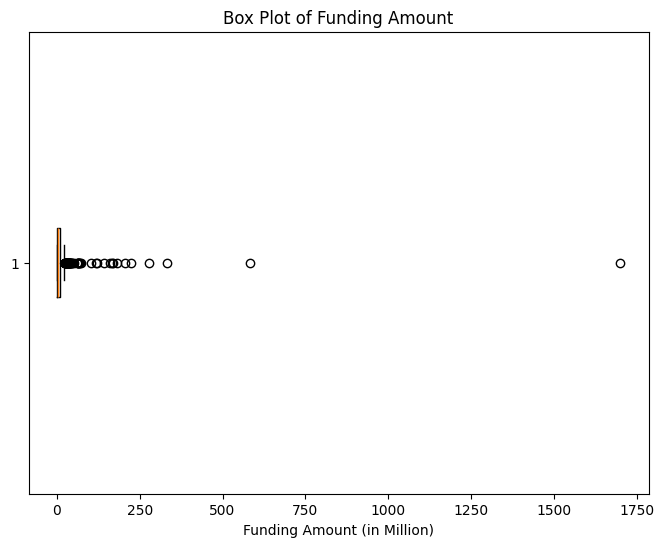

In [301]:
import matplotlib.pyplot as plt

# Plot box plot for Funds_in_million
plt.figure(figsize=(8, 6))
plt.boxplot(df1['Funds_in_million'], vert=False)
plt.xlabel('Funding Amount (in Million)')
plt.title('Box Plot of Funding Amount')
plt.show()

In [302]:
# Calculate the first quartile (Q1)
Q1 = df1['Funds_in_million'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df1['Funds_in_million'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the upper fence
upper_fence = Q3 + 1.5 * IQR

# Count the number of outliers greater than the upper fence
outliers_count = len(df1[df1['Funds_in_million'] > upper_fence])

# Display the number of outliers
print("Number of outliers greater than the upper fence:", outliers_count)


Number of outliers greater than the upper fence: 60


In [303]:
# Check frequency of OperatingState feature classes
operating_state_frequency = df1['OperatingState'].value_counts()

# Print the frequency of classes
print("Frequency of OperatingState feature classes:")
print(operating_state_frequency)


Frequency of OperatingState feature classes:
OperatingState
Operating    319
Acquired      66
Closed        57
Ipo            4
Name: count, dtype: int64


4. Statistical Analysis: [10 Marks]
A. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down? [1 Mark]
B. Write the null hypothesis and alternative hypothesis. [1 Mark]
C. Test for significance and conclusion [1 Mark]
D. Make a copy of the original data frame. [1 Mark]
E. Check frequency distribution of Result variables. [1 Mark]
F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating [1 Mark]
G. Write your hypothesis comparing the proportion of companies that are operating between winners and contestants: [2 Mark]
H. Test for significance and conclusion [1 Mark]
I. Select only the Event that has ‘disrupt’ keyword from 2013 onwards.

In [304]:
from scipy.stats import ttest_ind

# Separate funds raised by companies that are still operating and companies that closed down
funds_operating = df1[df1['OperatingState'] == 'Operating']['Funds_in_million']
funds_closed = df1[df1['OperatingState'] == 'Closed']['Funds_in_million']

# Perform t-test
t_statistic, p_value = ttest_ind(funds_operating, funds_closed, equal_var=False)

# Set significance level
alpha = 0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between funds raised by companies that are still operating and companies that closed down.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between funds raised by companies that are still operating and companies that closed down.")


T-statistic: 2.6727214329249227
P-value: 0.007898898722704632
Reject the null hypothesis. There is a significant difference between funds raised by companies that are still operating and companies that closed down.


**Write the null hypothesis and alternative hypothesis

Anwer:
Null Hypothesis (H0): There is no significant difference in the mean funds raised by companies that are still operating and companies that closed down.

H0: μ_operating = μ_closed
Alternative Hypothesis (H1): There is a significant difference in the mean funds raised by companies that are still operating and companies that closed down.

H1: μ_operating ≠ μ_closed
In plain terms, the null hypothesis suggests that the mean funds raised by companies that are still operating are equal to the mean funds raised by companies that closed down. The alternative hypothesis suggests that there is a difference in the mean funds raised between these two groups.

During hypothesis testing, we evaluate the evidence from the data to determine whether to reject the null hypothesis in favor of the alternative hypothesis, based on the calculated test statistic and p-value.

#Question: Test for significance and conclusion

In [305]:
# Perform t-test
t_statistic, p_value = ttest_ind(funds_operating, funds_closed, equal_var=False)

# Set significance level
alpha = 0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check for significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between funds raised by companies that are still operating and companies that closed down.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between funds raised by companies that are still operating and companies that closed down.")


T-statistic: 2.6727214329249227
P-value: 0.007898898722704632
Reject the null hypothesis. There is a significant difference between funds raised by companies that are still operating and companies that closed down.


In [306]:
#Make a copy of the original data frame.

df2 = df1.copy()

In [307]:
# Check frequency distribution of Result variable
result_frequency = df2['Result'].value_counts()

# Print the frequency distribution
print("Frequency distribution of Result variable:")
print(result_frequency)


Frequency distribution of Result variable:
Result
Contestant         312
Finalist            65
Audience choice     25
Winner              25
Runner up           19
Name: count, dtype: int64


Calculate percentage of winners that are still operating and percentage of contestants that are still operating 

In [308]:
# Calculate the total number of winners
total_winners = df2[df2['Result'] == 'Winner'].shape[0]

# Calculate the total number of contestants
total_contestants = df2[df2['Result'] == 'Contestant'].shape[0]

# Calculate the number of winners that are still operating
winners_operating = df2[(df2['Result'] == 'Winner') & (df2['OperatingState'] == 'Operating')].shape[0]

# Calculate the number of contestants that are still operating
contestants_operating = df2[(df2['Result'] == 'Contestant') & (df2['OperatingState'] == 'Operating')].shape[0]

# Calculate the percentages
percentage_winners_operating = (winners_operating / total_winners) * 100
percentage_contestants_operating = (contestants_operating / total_contestants) * 100

# Print the percentages
print("Percentage of winners that are still operating:", percentage_winners_operating)
print("Percentage of contestants that are still operating:", percentage_contestants_operating)

# Calculate the number of winners that are still operating
winners_not_operating = df2[(df2['Result'] == 'Winner') & (df2['OperatingState'] != 'Operating')].shape[0]

# Calculate the number of contestants that are still operating
contestants_not_operating = df2[(df2['Result'] == 'Contestant') & (df2['OperatingState'] != 'Operating')].shape[0]

# Calculate the percentages
percentage_winners_not_operating = (winners_not_operating / total_winners) * 100
percentage_contestants_not_operating = (contestants_not_operating / total_contestants) * 100

# Print the percentages
print("Percentage of winners that are not operating:", percentage_winners_not_operating)
print("Percentage of contestants that are not operating:", percentage_contestants_not_operating)


Percentage of winners that are still operating: 72.0
Percentage of contestants that are still operating: 68.58974358974359
Percentage of winners that are not operating: 28.000000000000004
Percentage of contestants that are not operating: 31.41025641025641


Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:

Answer:
The Null Hypothesis suggests that the proportion of operational companies is equal among both winners and contestants. The Alternative Hypothesis argues that there's a difference in this proportion.

To break it down, the Null Hypothesis assumes that the percentage of operational companies among winners is the same as among contestants. On the other hand, the Alternative Hypothesis implies there's a distinction in these percentages.

I'll perform a test to check if this difference (in the below section), if any, is significant. If the test reveals a p-value lower than 0.05 (a common threshold), we reject the Null Hypothesis, indicating a significant difference. If not, we cannot reject the Null Hypothesis, suggesting there's no significant difference.

In [309]:
import numpy as np
from scipy.stats import norm

# Observed counts
successes = np.array([winners_operating, contestants_operating])
nobs = np.array([winners_operating + winners_not_operating, contestants_operating + contestants_not_operating])

# Proportion of operational companies among winners and contestants
p1 = successes[0] / nobs[0]
p2 = successes[1] / nobs[1]

# Combined proportion
p_combined = (successes[0] + successes[1]) / (nobs[0] + nobs[1])

# Standard error
se = np.sqrt(p_combined * (1 - p_combined) * (1 / nobs[0] + 1 / nobs[1]))

# Z-score
z_score = (p1 - p2) / se

# Two-tailed p-value
p_value = 2 * (1 - norm.cdf(np.abs(z_score)))

# Print the results
print("Z-statistic:", z_score)
print("P-value:", p_value)

# Check for significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the proportion of operational companies between winners and contestants.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the proportion of operational companies between winners and contestants.")

Z-statistic: 0.3542506401722957
P-value: 0.7231510556194247
Fail to reject the null hypothesis. There is no significant difference in the proportion of operational companies between winners and contestants.


Select only the Event that has ‘disrupt’ keyword from 2013 onwards.

In [310]:
# Convert 'Event' column to string type to use str.contains() method
df2['Event'] = df2['Event'].astype(str)

# Select rows where 'Event' contains 'disrupt' and the year is 2013 or onwards
disrupt_events_2013_onwards = df2[df2['Event'].str.contains('disrupt', case=False) & (df2['Event'].str.extract(r'(\d{4})').astype(float) >= 2013)]

# Display the selected rows
print(disrupt_events_2013_onwards)


    Startup Product Funding Event Result OperatingState  Funds_in_million
1       NaN     NaN     NaN   NaN    NaN            NaN               NaN
3       NaN     NaN     NaN   NaN    NaN            NaN               NaN
5       NaN     NaN     NaN   NaN    NaN            NaN               NaN
6       NaN     NaN     NaN   NaN    NaN            NaN               NaN
10      NaN     NaN     NaN   NaN    NaN            NaN               NaN
..      ...     ...     ...   ...    ...            ...               ...
657     NaN     NaN     NaN   NaN    NaN            NaN               NaN
658     NaN     NaN     NaN   NaN    NaN            NaN               NaN
659     NaN     NaN     NaN   NaN    NaN            NaN               NaN
660     NaN     NaN     NaN   NaN    NaN            NaN               NaN
661     NaN     NaN     NaN   NaN    NaN            NaN               NaN

[446 rows x 7 columns]
